# 感知器模型(二类分类的线性分类模型)

## 算法
输入：训练数据集$T={(x_1,y_1),(x_2,y_2),\dots(x_N,y_N,)}$，其中$x_i\in\chi=R^n$，$y_i\in\Upsilon={-1,+1}$，$i=1,2,\dots,N$；学习率$\eta(0<\eta\leq)$；

（1）选取初始值$w_0,b_0$

（2）在训练集中选取数据$(x_i,y_i)$

（3）如果$y_i(wx_i+b\leq0)$

　　　　　　$w\leftarrow w+\eta y_i x_i $ 

　　　　　　$b\leftarrow b+\eta y_i$
            
 （4）转至（2），直至训练集中没有误分类点 
 ## 算法实例

Start read data
read data cost  4.427253246307373  second 

Start training
training cost  1.2910737991333008  second 

Start predicting
predicting cost  2.732156276702881  second 

The accruacy socre is  0.973737373737


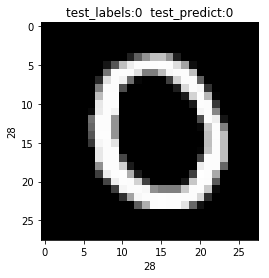

In [3]:
# %load binary_perceptron.py
"""
Spyder Editor

This is a temporary script file
"""

#%% 加载包
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#%% 感知机 类
class Perceptron(object):

    def __init__(self):
        self.learning_step = 0.00001
        self.max_iteration = 5000

    def predict_(self, x):
        #wx = sum([self.w[j] * x[j] for j in range(len(self.w))])
        wx = np.dot(self.w,x)
        return int(wx > 0)

    def train(self, features, labels):
        self.w = [0.0] * (len(features[0]) + 1)

        correct_count = 0
        time = 0

        while time < self.max_iteration:
            index = random.randint(0, len(labels) - 1)
            x = list(features[index])
            x.append(1.0)
            y = 2 * labels[index] - 1
            #wx = sum([self.w[j] * x[j] for j in range(len(self.w))])
            wx = np.dot(self.w,x)

            if wx * y > 0:
                correct_count += 1
                if correct_count > self.max_iteration:
                    break
                continue

            for i in range(len(self.w)):
                self.w[i] += self.learning_step * (y * x[i])

    def predict(self,features):
        labels = []
        for feature in features:
            x = list(feature)
            x.append(1)
            labels.append(self.predict_(x))
        return labels

#%% 主函数
if __name__ == '__main__':

    print('Start read data')

    time_1 = time.time()

    raw_data = pd.read_csv('../data/train_binary.csv', header=0)
    data = raw_data.values

    imgs = data[0::, 1::]
    labels = data[::, 0]

    # 选取 2/3 数据作为训练集， 1/3 数据作为测试集
    train_features, test_features, train_labels, test_labels = train_test_split(
        imgs, labels, test_size=0.33, random_state=23323)
    # print train_features.shape
    # print train_features.shape

    time_2 = time.time()
    print('read data cost ', time_2 - time_1, ' second', '\n')

    print('Start training')
    p = Perceptron()
    p.train(train_features, train_labels)

    time_3 = time.time()
    print('training cost ', time_3 - time_2, ' second', '\n')

    print('Start predicting')
    test_predict = p.predict(test_features)
    time_4 = time.time()
    print('predicting cost ', time_4 - time_3, ' second', '\n')

    score = accuracy_score(test_labels, test_predict)
    print("The accruacy socre is ", score)

#%% 展示效果
    index = random.randint(0, len(test_labels) - 1)
    x = test_features[index].reshape(28,28)
    TestLabel = pd.DataFrame({'test_labels':test_labels,'test_predict':test_predict})
    # 画图
    implot = plt.imshow(x, cmap=plt.cm.gray,interpolation='none')
    plt.xlabel('28')
    plt.ylabel('28')
    plt.title('test_labels:'+str(TestLabel.iloc[index,0])+'  test_predict:'+str(TestLabel.iloc[index,1]))
    plt.show()
